In [284]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import scipy
from tqdm.notebook import tqdm  

In [285]:
measles_data = np.array([26800, 9100, 6700, 5400, 4000, 400]) # Measles gradient


In [17]:
RSV_data = np.array([[21523, 18363, 18354],
                     [17765, 14929, 14681],
                     [ 7910,  6497,  7076],
                     [ 8710,  7052,  7234],
                     [ 8470,  7248,  6867],
                     [ 5809,  4852,  4782],
                     [ 5530,  4089,  5031],
                     [ 3802,  2929,  2997],
                     [ 3191,  2742,  2665],
                     [   33,    12,    29]])
RSV_data

array([[21523, 18363, 18354],
       [17765, 14929, 14681],
       [ 7910,  6497,  7076],
       [ 8710,  7052,  7234],
       [ 8470,  7248,  6867],
       [ 5809,  4852,  4782],
       [ 5530,  4089,  5031],
       [ 3802,  2929,  2997],
       [ 3191,  2742,  2665],
       [   33,    12,    29]])

In [18]:
EBOV_data = np.array([[3322,3013,2345,1697,1079,584,228], # Ebola Gradient
                      [651,663,435,482,254,180,43]]).T
EBOV_data

array([[3322,  651],
       [3013,  663],
       [2345,  435],
       [1697,  482],
       [1079,  254],
       [ 584,  180],
       [ 228,   43]])

In [19]:
MV_data = np.array([[851,688,493,388,336,211,48], # Marbug Gradient
                      [108,103,57,59,44,30,5]]).T
MV_data

array([[851, 108],
       [688, 103],
       [493,  57],
       [388,  59],
       [336,  44],
       [211,  30],
       [ 48,   5]])

In [20]:
# VSV data normalized to cpm of starting mRNA 
vsv_data = np.array([1, .68, .48, .32, .07])
vsv_data = (vsv_data /  np.sum(vsv_data)) * (1.25e4)
vsv_data = vsv_data.astype(int)
vsv_data

array([4901, 3333, 2352, 1568,  343])

In [21]:
# counts determined based on average number of mRNA in a mammalian cell PubMed ID23897237
# and fraction of viral mRNA:total cellular mRNA

PIV2_data = np.array([[47.25,20.44,14.78,13.10,7.49,1.64], # PIV2 gradients
                      [47.28,19.58,13.76,10.93,6.31,0.91],
                      [48.10,21.27,13.71,10.87,5.80,0.98]]).T
PIV2_data =PIV2_data/np.sum(PIV2_data, axis = 0)
PIV2_tot = ( np.array([8.33,16.46,19.58])/100 ) * 200000
PIV2_data = PIV2_tot * PIV2_data
PIV2_data = PIV2_data.astype(int)
PIV2_data

array([[ 7518, 15758, 18699],
       [ 3252,  6526,  8268],
       [ 2351,  4586,  5329],
       [ 2084,  3642,  4225],
       [ 1191,  2103,  2254],
       [  260,   303,   380]])

In [22]:
PIV5_data = np.array([[35.08, 22.27,15.87, 11.09, 11.56, 5.95, 0.20],# PIV5 gradients
                      [37.89, 20.49, 13.55, 10.68, 10.28, 6.11, 0],
                      [27.94, 15.92, 17.27, 14.48, 12.21, 11.82, 0.18]]).T
PIV5_data =PIV5_data/np.sum(PIV5_data, axis = 0)
PIV5_tot = ( np.array([4.77,4.39,2.47])/100 ) * 200000
PIV5_data = PIV5_tot * PIV5_data
PIV5_data = PIV5_data.astype(int)
PIV5_data

array([[3280, 3360, 1382],
       [2082, 1817,  787],
       [1484, 1201,  854],
       [1037,  947,  716],
       [1080,  911,  604],
       [ 556,  541,  584],
       [  18,    0,    8]])

In [23]:
PIV3_data = np.array([[32.28,19.57,20.74,16.17,10.61,1.35], # PIV3 gradients
                      [28.42,15.60,21.95,18.07,14.57,0.30],
                      [28.52,16.66,20.09,16.55,17.80,0.66],
                      [32.08,22.07,17.10,12.61,15.36,0.73]]).T
PIV3_data =PIV3_data/np.sum(PIV3_data, axis = 0)

PIV3_tot = ( np.array([10, 17.45,16.55,12.56])/100 ) * 200000
PIV3_data = PIV3_tot * PIV3_data
PIV3_data = PIV3_data.astype(int)
PIV3_data

array([[ 6409, 10027,  9413,  8062],
       [ 3886,  5504,  5499,  5546],
       [ 4118,  7744,  6631,  4297],
       [ 3210,  6375,  5462,  3169],
       [ 2106,  5140,  5875,  3860],
       [  268,   105,   217,   183]])

In [24]:
MuV_data = np.array([[30.13,27.56,15.30,10.41,9.88,6.28,2.34], # Mumps gradients
                      [30.48,31.26,14.55,8.15,7.69,5.45,1.47],
                      [31.32,34.62,12.92,6.83,6.95,4.63,1.16]]).T
MuV_data = MuV_data/np.sum(MuV_data, axis = 0)
MuV_tot = ( np.array([9.97,16.88,15.95])/100 ) * 200000
MuV_data = MuV_tot * MuV_data
MuV_data = MuV_data.astype(int)
MuV_data

array([[ 5895, 10388, 10150],
       [ 5392, 10654, 11219],
       [ 2993,  4959,  4187],
       [ 2037,  2777,  2213],
       [ 1933,  2621,  2252],
       [ 1228,  1857,  1500],
       [  457,   501,   375]])

In [25]:
# define list of virus names
viruses = ["VSV", "MeV", "PIV2", "PIV3", "PIV5", "MuV", "EBOV", "MV", "RSV"]
# define list of virus genes and their orders
virus_gene_names = [
    ['N', 'P', 'M', 'G', 'L'],
    ['N', 'P', 'M', 'F', "H", 'L'],
    ['NP', 'VIP', 'M', 'F', "HN", 'L'],
    ['NP', 'P/D/C', 'M', 'F', "HN", 'L'], 
    ['NP', 'VIP', 'M', 'F', "SH","HN", 'L'],
    ['NP', 'V/P', 'M', 'F', "SH","HN", 'L'],
    ["NP", "VP35", "VP40", "GP", "VP30", "VP24", "L"],
    ["NP", "VP35", "VP40", "GP", "VP30", "VP24", "L"],
    ["NS1", "NS2", "N", "P", "M", "SH", "G", "F", "M2", "L"]]
# define list of mean expression of each gene for each virus
virus_data = [vsv_data, measles_data, PIV2_data, PIV3_data, PIV5_data, MuV_data, EBOV_data, MV_data, RSV_data]





In [26]:
# define lists of position of gene stop signal for each gene
VSV_genome_pos = np.array([1376, 2199, 3039, 4713, 11095])
VSV_genome_pos = np.array(VSV_genome_pos - np.min(VSV_genome_pos))
VSV_genome_pos

#
measles_genome_pos =  np.array([1744,3402,4872,7247,9208,15854])
measles_genome_pos = np.array(measles_genome_pos - np.min(measles_genome_pos))
measles_genome_pos

#
PIV2_genome_pos =  np.array([1915, 3361,4738,6626,8738,15621])
PIV2_genome_pos = np.array(PIV2_genome_pos - np.min(PIV2_genome_pos))
PIV2_genome_pos

#
PIV3_genome_pos =  np.array([1658, 3595,4814,6691,8524,15347])
PIV3_genome_pos = np.array(PIV3_genome_pos - np.min(PIV3_genome_pos))
PIV3_genome_pos

#
PIV5_genome_pos =  np.array([1787, 3092,4478,6219,6515,8392,15215])
PIV5_genome_pos = np.array(PIV5_genome_pos - np.min(PIV5_genome_pos))
PIV5_genome_pos

#
MuV_genome_pos =  np.array([1906, 3226,4481,6210, 6533, 8428, 15360])
MuV_genome_pos = np.array(MuV_genome_pos - np.min(MuV_genome_pos))
MuV_genome_pos

RSV_genome_pos = np.array([576,1098,2327,3242,4209,4628,5595,7550,8557,15067])
RSV_genome_pos = np.array(RSV_genome_pos - np.min(RSV_genome_pos))
RSV_genome_pos

EBOV_genome_pos =  np.array([3026,4407,5894,8305,9740,11518,18282])
EBOV_genome_pos = np.array(EBOV_genome_pos - np.min(EBOV_genome_pos))
EBOV_genome_pos

MV_genome_pos =  np.array([2844,4410,5819,8670,10016,11285,19037])
MV_genome_pos = np.array(MV_genome_pos - np.min(MV_genome_pos))
MV_genome_pos

virus_genome_pos = [VSV_genome_pos, measles_genome_pos, PIV2_genome_pos, PIV3_genome_pos, PIV5_genome_pos, MuV_genome_pos, EBOV_genome_pos, MV_genome_pos, RSV_genome_pos]



In [27]:
# objective function for fitting model

def obj_fun(x):
    p = x[0]
    pred = np.array([p**x for x in genome_pos])
    lambda_pred = pred/np.sum(pred)
    LL = 0
    if len(dv.shape) == 1:
        LL += np.sum(scipy.stats.poisson.logpmf(dv, lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL * -1
    else:
        for i in range(dv.shape[1]):
            LL += np.sum(scipy.stats.poisson.logpmf(dv[:,i], lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL * -1

In [28]:
# iterate through each virus and fit the model 100,000 times starting at random positions.

all_fits = []
all_funcs = []
for j in range(len(viruses)):
    fits = []
    funcs = []
    dv = np.array(virus_data[j])
    genome_pos = virus_genome_pos[j]
    for i in range(200000):
        res = minimize(obj_fun,( np.random.random() * .5 ) + .5, bounds = [[0.5, 1]], tol = 1e-20)
        fits.append(res.x)
        funcs.append(res.fun * -1)
    all_fits.append(fits)
    all_funcs.append(funcs)
    print(viruses[j])

VSV
MeV
PIV2
PIV3
PIV5
MuV
EBOV
MV
RSV


In [29]:

all_fits = np.array(all_fits).reshape([9,200000])


In [30]:
# save fits and then generate and save a file with the 
# statistics assocaited with the top 100 fits for each virus

for i in range(len(viruses)):
    df = pd.DataFrame([all_fits[i], all_funcs[i]]). T
    df.columns = ["p(walk)", "Log Likelihood"]
    df.to_csv(f"File1-All_Parameter_Fits_simple_model/{viruses[i]}_fits.csv")
    df = df.loc[np.array(df.iloc[:,-1]) > np.quantile(np.array(df.iloc[:,-1]), 1-.0005)]
    df_stats = pd.DataFrame([np.mean(df.iloc[:,0]), np.std(df.iloc[:,0]), np.max(df.iloc[:,0]), np.min(df.iloc[:,0]), df[df.iloc[:,1] == np.max(df.iloc[:,1])].iloc[0,0], df[df.iloc[:,1] == np.max(df.iloc[:,1])].iloc[0,-1]]).T
    df_stats.columns = ["Mean of Top 100 Fit Estimates", "Std of Top 100 Fit Estimates", "Max of Top 100 Fit Estimates", "Min of Top 100 Fit Estimates", "Best Fit Estimate", "Best Fit Log Likelihood"]
    df_stats.index = ["p(walk)"]
    df_stats.to_csv(f"File2-Top_100_Fit_Stats_simple_model/{viruses[i]}_fits.csv")
    
    


In [31]:
# Get the best fit parameter

dfs = pd.DataFrame()
for i in range(len(viruses)):
    df = pd.read_csv((f"File2-Top_100_Fit_Stats_simple_model/{viruses[i]}_fits.csv"))
    dfs = pd.concat([dfs, df])
best_fit_pars = dfs.iloc[:,3]
log_likeli = dfs.iloc[:,-1]

In [32]:
log_likeli

0   -1.054838e+05
0   -5.191247e+05
0   -8.315451e+05
0   -1.053596e+06
0   -1.864006e+05
0   -7.969324e+05
0   -1.221288e+05
0   -2.324031e+04
0   -2.263257e+06
Name: Best Fit Log Likelihood, dtype: float64

In [33]:

# Compile all fit stats into a single file

dfs = pd.DataFrame()
for i in range(len(viruses)):
    df = pd.read_csv((f"File2-Top_100_Fit_Stats_simple_model/{viruses[i]}_fits.csv"))
    dfs = pd.concat([dfs, df])
dfs.iloc[:,0] = viruses
dfs.index = viruses
print(1 / (1-dfs.iloc[:,1]))
dfs.iloc[:,2] = dfs.iloc[:,2].apply(lambda x: '{:.4e}'.format(x))
dfs.iloc[:,-1] = dfs.iloc[:,-1].apply(lambda x: '{:.4e}'.format(x))
dfs = dfs.round(5)
dfs.iloc[:, 0] = ["p(walk)"] * len(dfs.iloc[:, 0])
dfs.columns = ["Parameter"] + list(dfs.columns)[1:]
dfs.to_csv("File2-Top_100_Fit_Stats_simple_model/All_Viruses_Simple_Gradient.csv")
dfs

VSV     3359.804681
MeV     3501.715860
PIV2    3335.551075
PIV3    6299.138844
PIV5    3882.545819
MuV     3555.284885
EBOV    5739.451244
MV      6385.669792
RSV     3732.740628
Name: Mean of Top 100 Fit Estimates, dtype: float64


,Parameter,Mean of Top 100 Fit Estimates,Std of Top 100 Fit Estimates,Max of Top 100 Fit Estimates,Min of Top 100 Fit Estimates,Best Fit Estimate,Best Fit Log Likelihood
VSV,p(walk),0.99970,9.2653e-10,0.99970,0.99970,0.99970,-1.0548e+05
MeV,p(walk),0.99971,1.1185e-11,0.99971,0.99971,0.99971,-5.1912e+05
PIV2,p(walk),0.99970,8.2903e-12,0.99970,0.99970,0.99970,-8.3155e+05
PIV3,p(walk),0.99984,5.5089e-12,0.99984,0.99984,0.99984,-1.0536e+06
PIV5,p(walk),0.99974,7.4795e-12,0.99974,0.99974,0.99974,-1.8640e+05
MuV,p(walk),0.99972,8.0170e-12,0.99972,0.99972,0.99972,-7.9693e+05
EBOV,p(walk),0.99983,5.1629e-12,0.99983,0.99983,0.99983,-1.2213e+05
MV,p(walk),0.99984,4.8100e-12,0.99984,0.99984,0.99984,-2.3240e+04
RSV,p(walk),0.99973,8.0830e-12,0.99973,0.99973,0.99973,-2.2633e+06


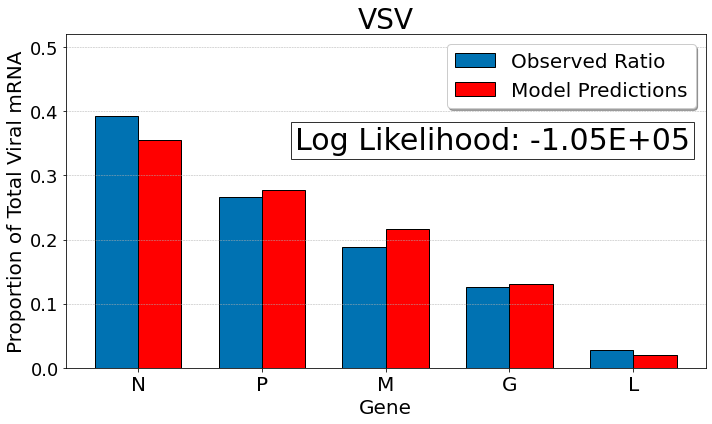

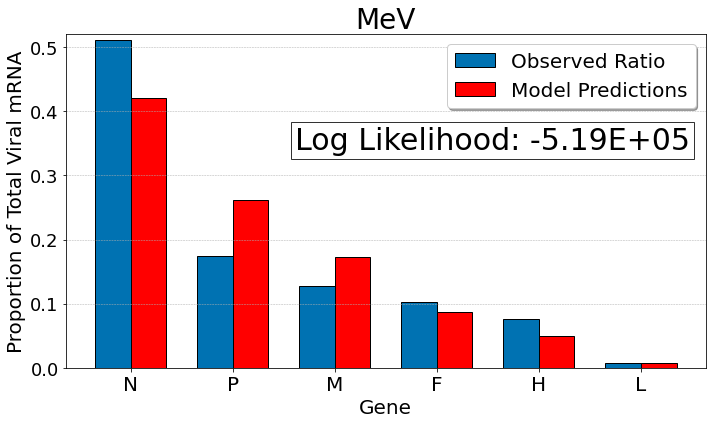

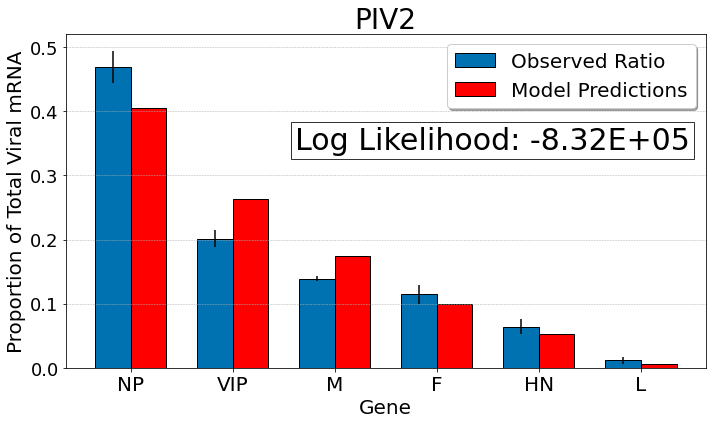

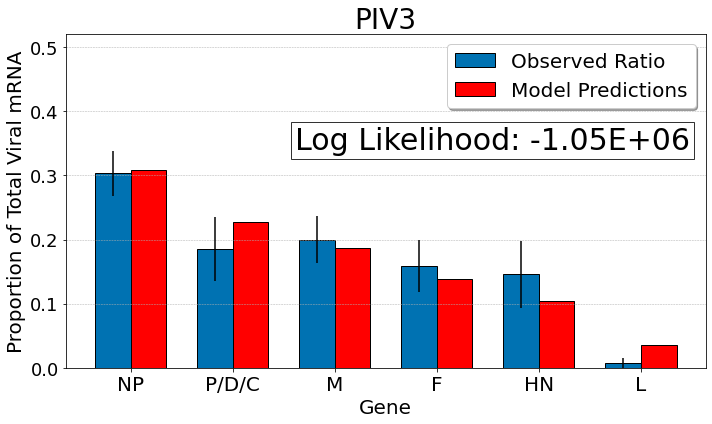

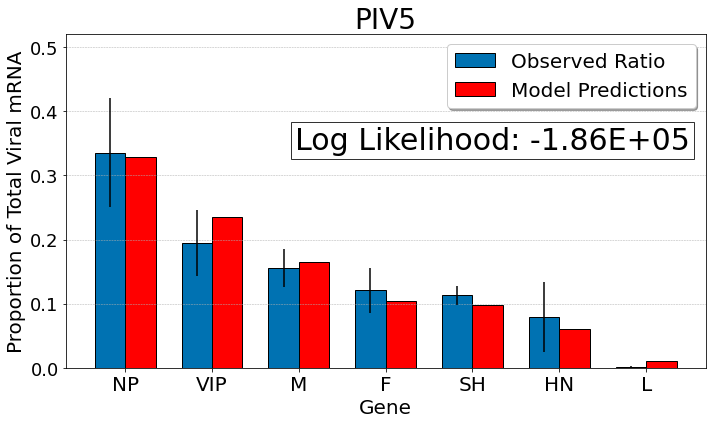

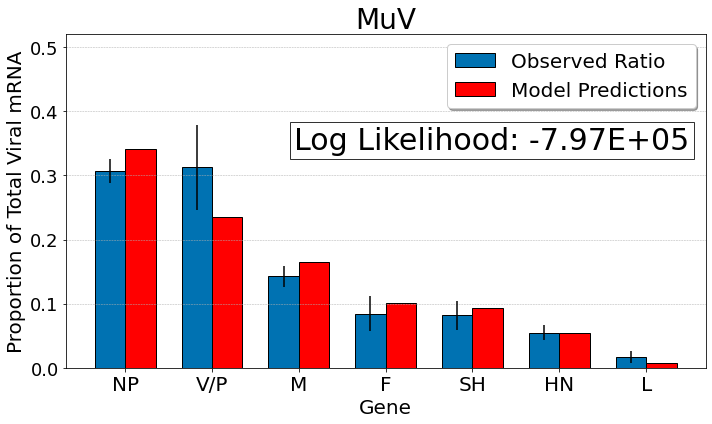

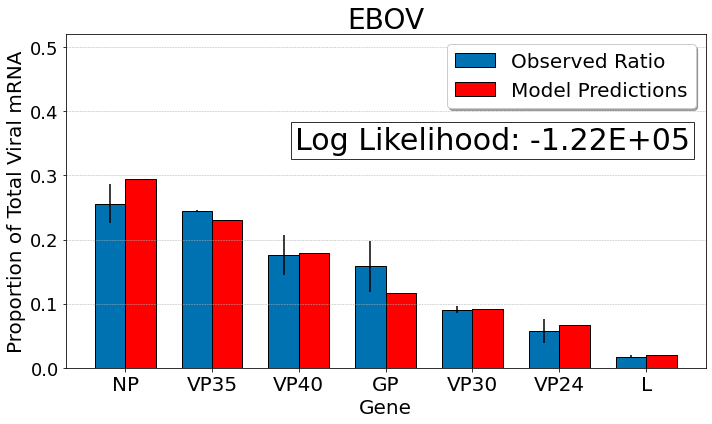

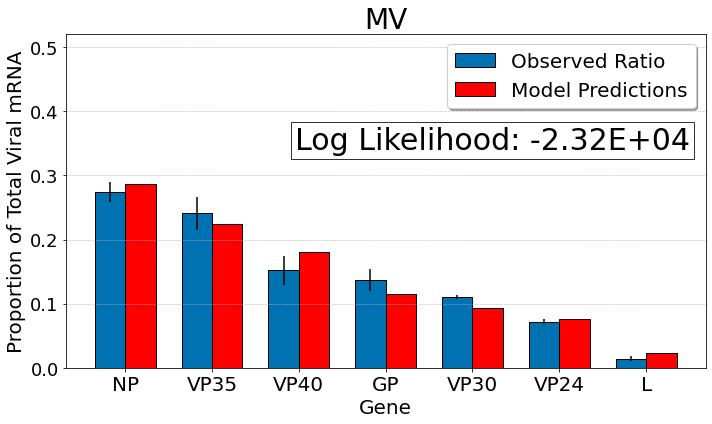

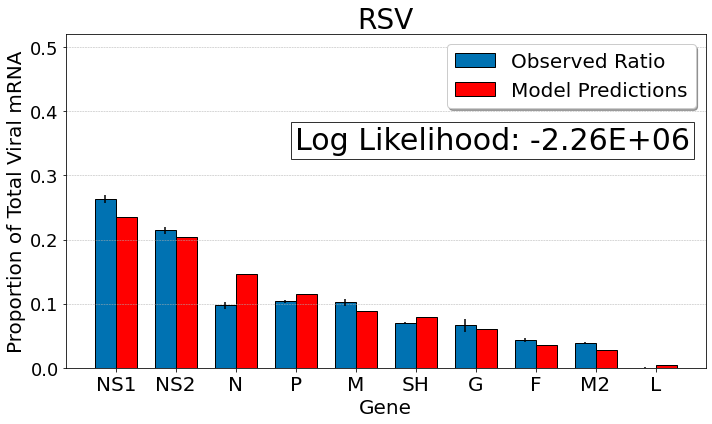

In [37]:
# Generate barplots of observed gradients and predicted gradients

for i in range(len(viruses)):
    genome_pos = virus_genome_pos[i]
    pars = best_fit_pars.iloc[i]
    pred = np.array([pars**x for x in genome_pos])
    pred_norm = pred/np.sum(pred)
    categories = virus_gene_names[i]
    indices = np.arange(len(categories))
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    # Create bars
    bar_width = 0.35
    ax.set_title(f'{viruses[i]}', fontsize=28)
    # Create bars for virus_means[i]
    if len(virus_data[i].shape) == 1:
        data_norm = virus_data[i]/np.sum(virus_data[i])
        ax.bar(indices - bar_width/2, data_norm, width=bar_width, color='#0072B2', edgecolor='black', label='Observed Ratio')
    
    else:
        data_norm = virus_data[i]/np.sum(virus_data[i],axis=0)
        ax.bar(indices - bar_width/2, np.mean(data_norm, axis = 1), width=bar_width, yerr= 2 * np.std(data_norm, axis = 1), color='#0072B2', edgecolor='black', label='Observed Ratio')
    
    # Increase y-axis label size
    ax.tick_params(axis='y', labelsize=18)
    
    # Create bars for pred_norm
    ax.bar(indices + bar_width/2, pred_norm, width=bar_width, color='red', edgecolor='black', label='Model Predictions')
    
    # Set legend with improved positioning and styling
    ax.legend(loc='best', fontsize=20, frameon=True, shadow=True)
    
    # Set labels, title, and ticks
    ax.set_xticks(indices)
    plt.ylim([0,.52])
    
    mse = log_likeli.iloc[i]
    ax.set_xticklabels(categories, fontsize=20)
    ax.set_ylabel('Proportion of Total Viral mRNA', fontsize=20)
    ax.set_xlabel('Gene', fontsize=20)
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    ax.text(.975, 0.725, 'Log Likelihood: {:.2E}'.format(mse) , transform=ax.transAxes, fontsize=30,
            verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))
    plt.tight_layout()
    plt.savefig(f"Figures/Fig2/{viruses[i]}_Gradients.svg")
    plt.show()   
    
    
    

In [313]:
dfs = pd.read_csv("File2-Top_100_Fit_Stats_simple_model/All_Viruses_Simple_Gradient.csv")
dfs

,Unnamed: 0,Parameter,Mean of Top 100 Fit Estimates,Std of Top 100 Fit Estimates,Max of Top 100 Fit Estimates,Min of Top 100 Fit Estimates,Best Fit Estimate,Best Fit Log Likelihood
0,VSV,p(walk),0.99970,9.265300e-10,0.99970,0.99970,0.99970,-105480.0
1,MeV,p(walk),0.99971,1.118500e-11,0.99971,0.99971,0.99971,-519120.0
2,PIV2,p(walk),0.99970,8.290300e-12,0.99970,0.99970,0.99970,-831550.0
3,PIV3,p(walk),0.99984,5.508900e-12,0.99984,0.99984,0.99984,-1053600.0
4,PIV5,p(walk),0.99974,7.479500e-12,0.99974,0.99974,0.99974,-186400.0
5,MuV,p(walk),0.99972,8.017000e-12,0.99972,0.99972,0.99972,-796930.0
6,EBOV,p(walk),0.99983,5.162900e-12,0.99983,0.99983,0.99983,-122130.0
7,MV,p(walk),0.99984,4.810000e-12,0.99984,0.99984,0.99984,-23240.0
8,RSV,p(walk),0.99973,8.083000e-12,0.99973,0.99973,0.99973,-2263300.0


In [152]:
# define code for performing MCMC
# This code is taken from the MCMC section of the UQ-Bio 2024 Github
# https://github.com/MunskyGroup/uqbio2024

def likelihood_ge(x):
    p = x[0]
    pred = np.array([p**x for x in genome_pos])
    lambda_pred = pred/np.sum(pred)
    LL = 1
    if len(dv.shape) == 1:
        LL *= np.sum(scipy.stats.poisson.logpmf(dv, lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL
    else:
        for i in range(dv.shape[1]):
            LL += np.sum(scipy.stats.poisson.logpmf(dv[:,i], lambda_pred))
        if np.isnan(LL):
            return np.inf
        return LL
    
def prior_ge(h):
    return scipy.stats.norm(p, scale=1).pdf(h)

def posterior_unnormalised_ge(h):
    return likelihood_ge(h) + np.log(prior_ge(h))

def logposterior_unnormalised_ge(x):
    rho = x
    log_likelihood = likelihood_ge(rho)
    log_prior = np.log(prior_ge(rho))
    return log_likelihood + log_prior

In [215]:

def simulate_step(log_target, proposal_width, x):
    """
    Perform one step of the MH algorithm starting at `x`, with a normal distribution
    for the proposal. `log_target` is the logarithm of the target distribution
    and `proposal_width` is the width of the proposal distribution. Returns the next
    sample.
    """
    # propose a new value
    y = x + proposal_width * np.random.randn(len(x))
    log_alpha = log_target(y) - log_target(x)     # the q-terms cancel
    if log_alpha > 0:
        return y           # accept

    alpha = np.exp(log_alpha)
    p = np.random.rand()
    if p < alpha:        # this happens with probability alpha
        return y           # accept
    else:
        return x           # reject

def metropolis_hastings(log_target, proposal_width, nsteps, x0):
    """
    Perform MCMC by running the Metropolis-Hastings algorithm for `nsteps` steps,
    starting at `x0`. `log_target` is the logarithm of the target distribution
    and `proposal_width` is the width of the proposal distribution. Returns a matrix
    of samples.
    """
    ret = np.zeros((nsteps, len(x0)))
    ret[0] = x0
    for i in tqdm(range(1, nsteps)):
        ret[i] = simulate_step(log_target, proposal_width, ret[i-1])
    return ret

In [303]:
MCMC_outs = []
for j in range(len(viruses)):
    dv = np.array(virus_data[j])
    genome_pos = virus_genome_pos[j]
    p = dfs.iloc[j:j+1].iloc[0,-2]
    nsamples = 101000
    burnin = 1000
    post_ge_mcmc = metropolis_hastings(logposterior_unnormalised_ge, .01, nsamples, np.array([p]))
    post_ge_mcmc = post_ge_mcmc[burnin:]  
    MCMC_outs.append(post_ge_mcmc) 


  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

  0%|          | 0/100999 [00:00<?, ?it/s]

In [305]:
MCMC_outs = np.array(MCMC_outs).reshape([9,100000])
np.save("File5-MCMC_Outputs/simple_model_MCMC_Raw.npy", MCMC_outs)


In [307]:
df = pd.DataFrame([viruses, np.mean(MCMC_outs, axis = 1), np.quantile(MCMC_outs, .025, axis = 1), np.quantile(MCMC_outs, .5, axis = 1), np.quantile(MCMC_outs, .975, axis = 1)])
df = df.T
df.columns =  ["Virus","Mean", "2.5% Quantile", "50% Quantile","97.5% Quantile" ]
df.to_csv("File5-MCMC_Outputs/simple_model_MCMC_statistics.csv")
df


,Virus,Mean,2.5% Quantile,50% Quantile,97.5% Quantile
0,VSV,0.999702,0.999694,0.999702,0.99971
1,MeV,0.999715,0.999711,0.999715,0.999718
2,PIV2,0.9997,0.999698,0.999699,0.999702
3,PIV3,0.999842,0.999839,0.999842,0.999844
4,PIV5,0.999743,0.999736,0.999742,0.999753
5,MuV,0.999719,0.999717,0.999719,0.999721
6,EBOV,0.999825,0.99982,0.999826,0.99983
7,MV,0.999843,0.999832,0.999844,0.999854
8,RSV,0.999732,0.99973,0.999732,0.999734
